# Libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Built-in libraries
#
import pandas as pd
import numpy  as np


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization libraries
#
import matplotlib.pyplot     as plt
import seaborn               as sns


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# User libraries
#
from utils.Outlier_detection import *

# Import data

In [3]:
%time 

# Load data
#
df = pd.read_csv('Data/6-kanal-2.csv')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


## Preprocess

In [4]:
# Rename 'created_at' to 'Date
#
df = df.rename(columns = {'created_at':'Date'})

# Set 'Date' as index
#
df['Date'] = df['Date'].astype('datetime64')
df.set_index('Date', inplace=True)

# Remove useless columns
#
del df['entry_id']
del df['latitude']
del df['longitude']
del df['elevation']
del df['status']

df.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,CO
Date,,,,,,
2022-01-27 16:12:53,29.1,18.0,0.7,0.7,238.0,182.0
2022-01-27 16:13:09,29.1,16.0,0.7,0.7,240.0,183.0
2022-01-27 16:13:25,29.1,17.0,0.7,0.7,239.0,182.0


In [5]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,CO
count,96581.000000,96581.000000,96581.000000,96581.000000,96581.000000,96581.000000
mean,24.538700,16.339373,1.775790,4.608331,172.549249,373.894213
std,1.333975,3.873400,7.310937,21.041912,73.515907,98.018911
min,18.100000,6.000000,0.000000,0.000000,3.000000,113.000000
25%,24.000000,13.000000,0.400000,0.600000,115.000000,287.000000
50%,24.300000,16.000000,0.800000,1.400000,195.000000,388.000000
75%,24.600000,19.000000,1.600000,3.200000,223.000000,434.000000
max,30.600000,29.000000,437.200010,1999.900020,684.000000,813.000000


## Visualization: Scatter plot

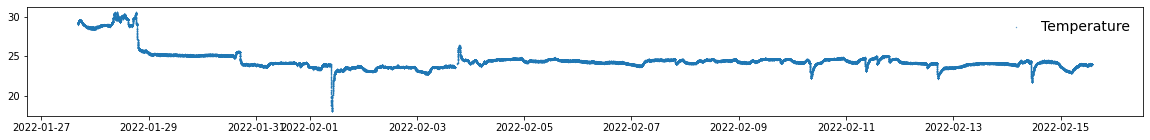

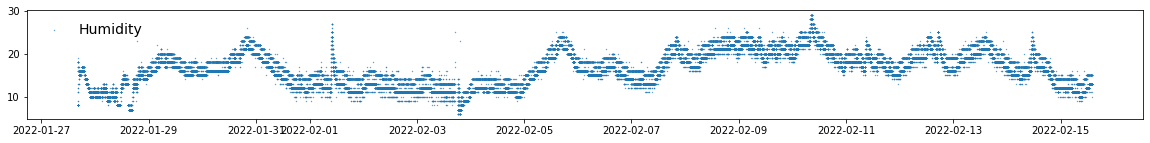

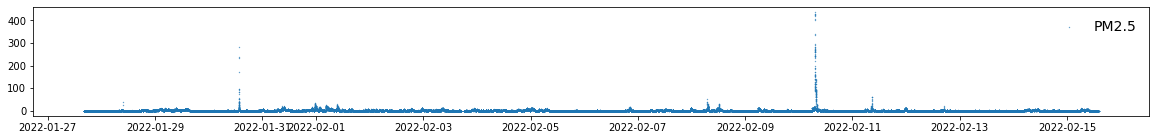

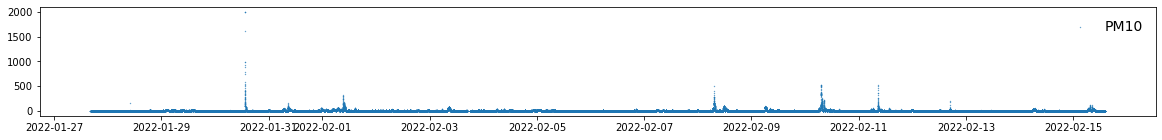

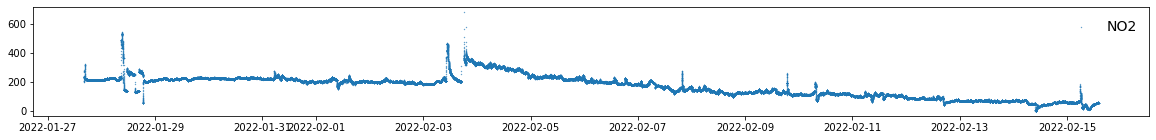

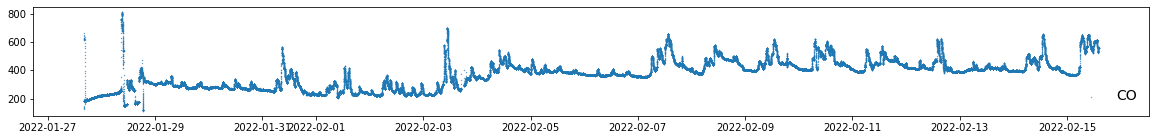

In [6]:
for feature in df.columns:
   
    plt.figure( figsize=(20, 2) )
    plt.scatter(x = df.index, y = df[feature], s = 0.1)
    plt.legend([ feature ], frameon = False, fontsize = 14)

# Data cleaning

## Cleaning process

**Findings**: 

- Remove all records previous 2022-01-29 - Not calibrated sensors
- Data cleaning
    - Feature: Temperature - Method: STD 
    - Feature: Humidity - None
    - Feature: PM2.5 - Method: IQR 
    - Feature: PM10 - Method: IQR 
    - Feature: NO2 - Method: STD 
    - Feature: CO - Method: STD 




Feature: Temperature
Lower bound: 22.450
Upper bound: 25.989


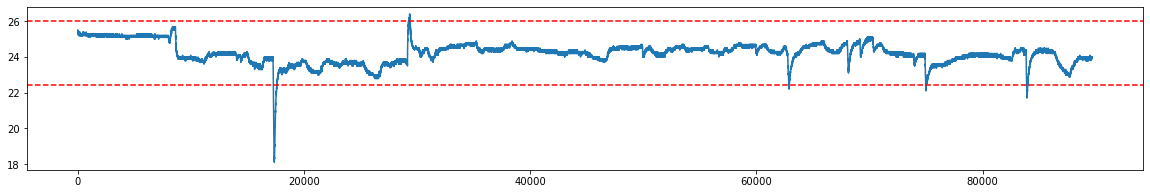

Feature: PM2.5
Lower bound: -1.300
Upper bound: 3.500


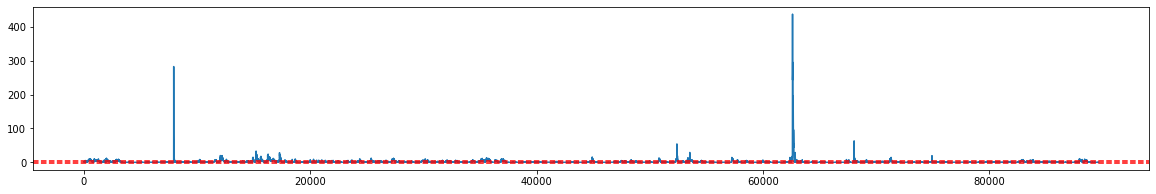

Feature: PM10
Lower bound: -3.350
Upper bound: 7.450


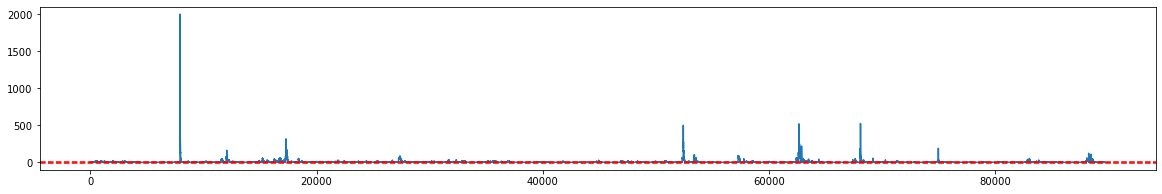

Feature: NO2
Lower bound: -51.257
Upper bound: 388.421


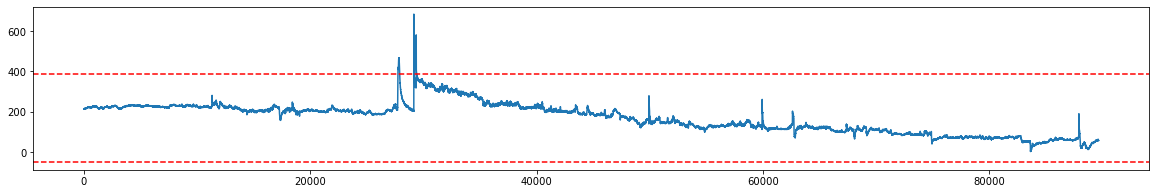

Feature: CO
Lower bound: 105.270
Upper bound: 659.917


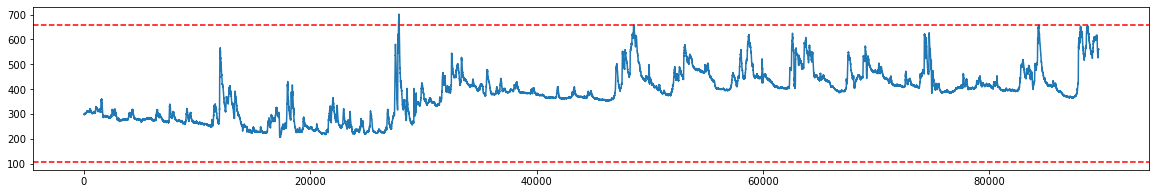

In [7]:
df = df[(df.index >= '2022-01-29') ]

# Feature: Temperature - Method: STD 
print('Feature: Temperature')
df[ 'Temperature' ] = detect_outliers( df[ 'Temperature' ].to_numpy(), Method = 'STD', verbose = True)

# Feature: Humidity - None

# Feature: PM2.5 - Method: IQR 
print('Feature: PM2.5')
df[ 'PM2.5' ] = detect_outliers( df[ 'PM2.5' ].to_numpy(), Method = 'IQR', verbose = True)

# Feature: PM10 - Method: IQR 
print('Feature: PM10')
df[ 'PM10' ] = detect_outliers( df[ 'PM10' ].to_numpy(), Method = 'IQR', verbose = True)

# Feature: NO2 - Method: STD 
print('Feature: NO2')
df[ 'NO2' ] = detect_outliers( df[ 'NO2' ].to_numpy(), Method = 'STD', verbose = True)


# Feature: CO - Method: STD 
print('Feature: CO')
df[ 'CO' ] = detect_outliers( df[ 'CO' ].to_numpy(), Method = 'STD', verbose = True)

## Visualization

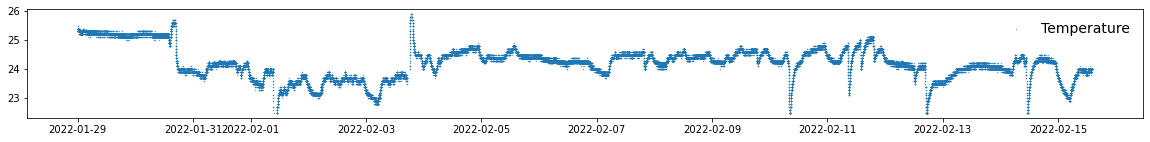

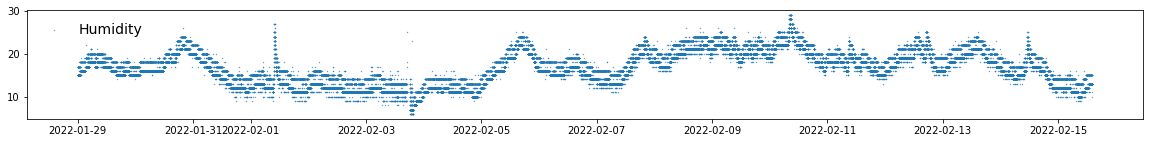

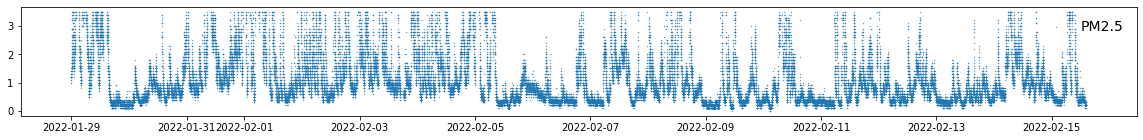

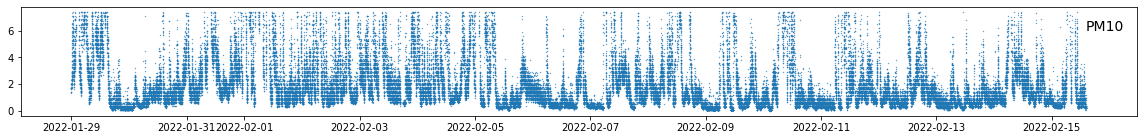

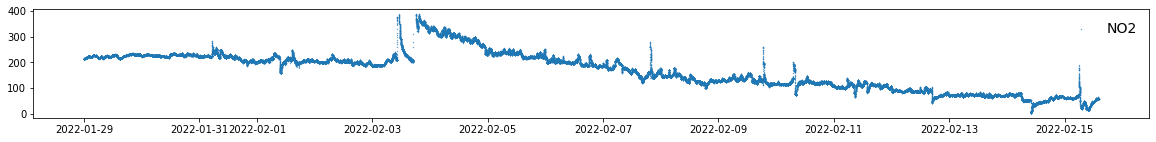

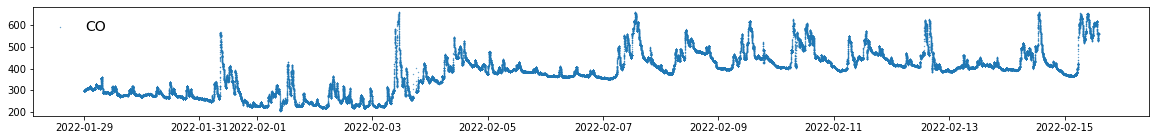

In [8]:
for feature in df.columns:
   
    plt.figure( figsize=(20, 2) )
    plt.scatter(x = df.index, y = df[feature], s = 0.1)
    plt.legend([ feature ], frameon = False, fontsize = 14)

# Save data

In [9]:
try:
    df.to_csv('metadata/6-kanal-2.csv')

    print('[INFO] Data have been successfully saved')
except:
    print('[ERROR] Data have been saved')

[INFO] Data have been successfully saved
